
Generated Data:
 Year  Total Reduction  Reduction due to Lower Energy Transportation  Reduction due to Switch to Non-Fossil Energy
 2023       100.000000                                    100.000000                                    100.000000
 2024        99.614322                                     99.737411                                     99.876911
 2025        97.818276                                     98.514571                                     99.303705
 2026        93.987874                                     95.906638                                     98.081236
 2027        87.658303                                     91.597143                                     96.061160
 2028        78.439942                                     85.320813                                     93.119130
 2029        65.990282                                     76.844449                                     89.145834
 2030        50.000000                                     65.9

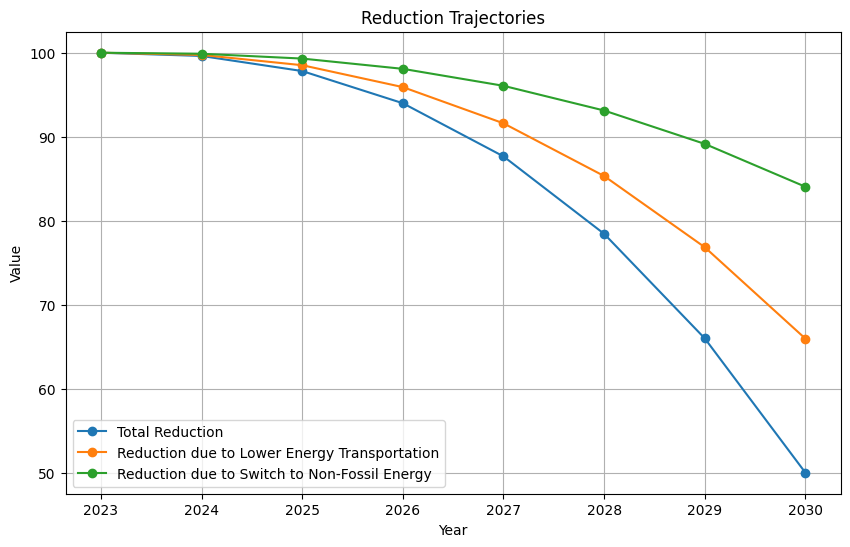

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate values based on the power function
def generate_values(start_value, end_value, start_year, end_year, exponent):
    years = np.arange(start_year, end_year + 1)
    t0 = start_year
    T = end_year
    s = (years - t0) / (T - t0)
    values = start_value - (start_value - end_value) * s ** exponent
    return years, values

# Input start and end years
start_year = 2023
end_year = 2030

# Input start and end values for Total Reduction
total_reduction_start = 100
total_reduction_end = 50

# Calculate delta_total_reduction
delta_total_reduction = total_reduction_start - total_reduction_end

# Use the ratio from your data to calculate delta_rlet and delta_rsnfe
ratio = 2.133333  # Derived from delta_rlet / delta_rsnfe
delta_rsnfe = delta_total_reduction / (1 + ratio)
delta_rlet = delta_total_reduction - delta_rsnfe

# Compute rlet_end and rsnfe_end
rlet_end = total_reduction_start - delta_rlet
rsnfe_end = total_reduction_start - delta_rsnfe

# Exponent for the curve shape
exponent = 2.5  # Adjust this value if needed

# Generate values for each column
years, total_reduction = generate_values(
    total_reduction_start, total_reduction_end, start_year, end_year, exponent
)
_, rlet = generate_values(
    total_reduction_start, rlet_end, start_year, end_year, exponent
)
_, rsnfe = generate_values(
    total_reduction_start, rsnfe_end, start_year, end_year, exponent
)

# Create a DataFrame to store the results
data = {
    'Year': years,
    'Total Reduction': total_reduction,
    'Reduction due to Lower Energy Transportation': rlet,
    'Reduction due to Switch to Non-Fossil Energy': rsnfe,
}
df = pd.DataFrame(data)

# Display the table
print("\nGenerated Data:")
print(df.to_string(index=False))

# Plot the graphs
plt.figure(figsize=(10, 6))

plt.plot(years, total_reduction, label='Total Reduction', marker='o')
plt.plot(
    years, rlet, label='Reduction due to Lower Energy Transportation', marker='o'
)
plt.plot(
    years,
    rsnfe,
    label='Reduction due to Switch to Non-Fossil Energy',
    marker='o',
)

plt.title('Reduction Trajectories')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

